## - Introduction to Machine Learning and Data Mining - <br> <br> <i> Project 1: Data feature extraction and visualisations </i>
### **_by Sebastian Sbirna_**

***

### 1.	Dataset and Problem Description

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from scipy.linalg import svd

pd.options.display.max_columns = 50

In [44]:
df = pd.read_csv('heart.csv')

Here, we will show an example of how the data looks like:

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2.	Dataset and Data Quality Assessment

We will analyse how `pandas` has interpreted the types of our attributes within the dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Above, we can see that `pandas` recognises all of our features as numerical, either integers or floats. However, this is misleading, since 8 of our attributes are actually categorical, and their numbers represent mappings to a real-world phenomena of the human heart. 

Therefore, even if we categorized the values of such attributes as numerical, we cannot include them into our analysis as numerical, since e.g. for variable `sex`, neither 0 nor 1 is better than the other, nor is such a variable of classification ratio, since the 0 value is only an internal convention in this dataset representing women. Therefore, any 'numerical' calculations using this variable are considered feasible by pandas' functions, while being incorrect for the real-world.

Nevertheless, we can perform an analysis of summary statistics on all types of variables (**_is this a good representation of summstats for cat vars??_**), in order to better understand the dataset and eventually, by combining with the knowledge we have from the dataset dictionary, spot some data quality issues.

In [43]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,sex_male,cp_atypical,cp_non_anginal,cp_asymptomatic,fbs_true,restecg_st_t,restecg_hypertrophy,exang_yes,slope_flat,slope_downsloping,ca_1,ca_2,ca_3,thal_fixed,thal_reversible,target
count,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,131.60473,247.155405,149.560811,1.059122,0.679054,0.165541,0.280405,0.476351,0.14527,0.496622,0.013514,0.327703,0.462838,0.466216,0.219595,0.128378,0.067568,0.060811,0.388514,0.540541
std,9.059471,17.72662,51.977011,22.970792,1.166474,0.467631,0.372297,0.449958,0.500286,0.35297,0.500835,0.115655,0.470171,0.499461,0.499702,0.414673,0.335077,0.251427,0.239388,0.488238,0.499198
min,29.000000,94.00000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.00000,211.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.00000,242.500000,152.500000,0.800000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,61.000000,140.00000,275.250000,166.000000,1.650000,1.000000,0.000000,1.000000,1.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,200.00000,564.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


According to the summary statistics, most things fall in line with the values described in the dataset dictionary as being expected.

However, we notice four important data quality differences:

1. There should be missing values within attributes `ca` and `thal`, according to [this resource](http://rstudio-pubs-static.s3.amazonaws.com/24341_184a58191486470cab97acdbbfe78ed5.html), represented as '?'. However, in our dataset, they don't seem to be present.


2. From the summary statistics, we can see that `thal` takes values between 0 and 3, which is erroneous, since the dataset description mentions it can only take values 3, 6 or 7.


3. `ca` from our dataset takes values between 0 and 3, however in the dataset description, it should take values between 1 and 4.


4. `slope` from our dataset takes values between 0 and 2, however in the dataset description, it should take values between 1 and 3.

We will perform a deeper investigation into the matter.

In [6]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

We have just found out that our missing values for attribute `ca` were still present in our dataset, however, instead of being represented as '?', they were represented as values outside the categorical mappings described in the dataset description.

Here, the missing values take up value '4', which is compromises data quality, since `ca` can only take integer values between 0 and 3. 

Since there are only 5 entries in the dataset which have this error, we will remove them altogether from the dataset.

In [7]:
df.drop(index = (df[df.ca == 4]).index, inplace = True)

The same happens for missing values in `thal`: they are represented as '0' instead of '?'. We will again remove all entries with such erroneous values from the dataset, in order to maintain a high dataset quality.

However, there is another problem here, mentioned previously: the categorical mappings of `thal` are completely out-of-bounds and scrambled, compared to what is expected (only integer values 3, 6 or 7 should be present).

Using, once more, [this resource](http://rstudio-pubs-static.s3.amazonaws.com/24341_184a58191486470cab97acdbbfe78ed5.html), we have found that the data itself has not been compromised, and only its mappings needed to be redone, which we have performed below:

In [8]:
df['thal'].value_counts()

2    163
3    115
1     18
0      2
Name: thal, dtype: int64

In [9]:
df.drop(index = (df[df.thal == 0]).index, inplace = True)

In [10]:
df.loc[df.thal == 1, 'thal'] = 6
df.loc[df.thal == 3, 'thal'] = 7
df.loc[df.thal == 2, 'thal'] = 3

Now, if we check, we will see that the attribute `thal` has been cleaned up of its data quality issues, and is represented as expected:

In [11]:
df['thal'].value_counts()

3    163
7    115
6     18
Name: thal, dtype: int64

For our third data issue, we will encode the values of `ca` with the proper categorical encodings:

In [12]:
df['cp'].value_counts()

0    141
2     83
1     49
3     23
Name: cp, dtype: int64

In [13]:
df.loc[df.cp == 0, 'cp'] = 4

df.loc[df.cp == 3, 'cp'] = 7

df.loc[df.cp == 2, 'cp'] = 3
df.loc[df.cp == 1, 'cp'] = 2
df.loc[df.cp == 7, 'cp'] = 1

We will do the same with encoding the values of `slope` according to the proper categorical encodings:

In [14]:
df['slope'].value_counts()

2    138
1    137
0     21
Name: slope, dtype: int64

In [15]:
df.loc[df.slope == 2, 'slope'] = 3
df.loc[df.slope == 1, 'slope'] = 2
df.loc[df.slope == 0, 'slope'] = 1

Finally, we will check to see how many dataset entries we have left, after performing the dropping of entries containing missing/erroneous data:

In [16]:
df.shape

(296, 14)

### 3.	Exploratory Data Analysis (EDA) – Visualizations

First, we will save a list of all the feature names which are numerical, in order to not mix in our analysis results for numerical variables with results from categorical variables

In [17]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Before we can perform a PCA analysis, we need to understand our data.

More specifically, a PCA analysis is very sensitive to:
* outliers in attributes
* attribute distributions not being univariate normal distributions
* uncorrelated variables 

It is not a problem in itself if our variables have very weak correlations between them, however in that case, PCA is not as useful, as relationships between data don't capture the variance of the data well, and we will not reduce complexity much by performing PCA, as we will need to be using most of the PCA components anyway, in order to ensure a good representation of our data.

We need to be looking for these guidelines when analysing the data, before performing the PCA analysis.

Here, boxplots for all 5 numerical variables have been created, in order to see which variables have outliers and what their magnitude is.

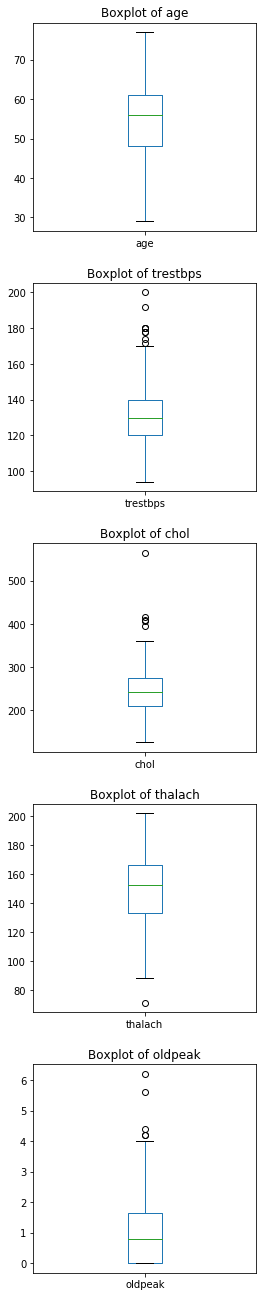

In [18]:
fig = plt.figure(figsize=(4, 23))
for i in range(5):
    # Creating a subplot placeholder corresponding to an attribute
    plt.subplot(5, 1, i+1)
    
    # Make a space between the different rows of plots
    plt.subplots_adjust(hspace = 0.25)
    
    df[numerical_columns[i]].plot(kind = 'box');
    plt.title('Boxplot of ' + str(numerical_columns[i]));

From this plot, we conclude that our numerical variables do hold outliers within themselves, with the exception of `age`. This may create problems when visualising the PCA clusters, since the squaring of residuals resulting from outliers will be very high, thus dominating the total Frobenius norm and becoming the main factors driving the different PCA components.

For us to quickly see an overview of the histogram distributions of individual numerical variables (_to discover whether the attributes have unimodal and normal distribution_), as well as pair-wise relationships between them (_to discover eventual correlations_), we have plotted the following pair plot below:

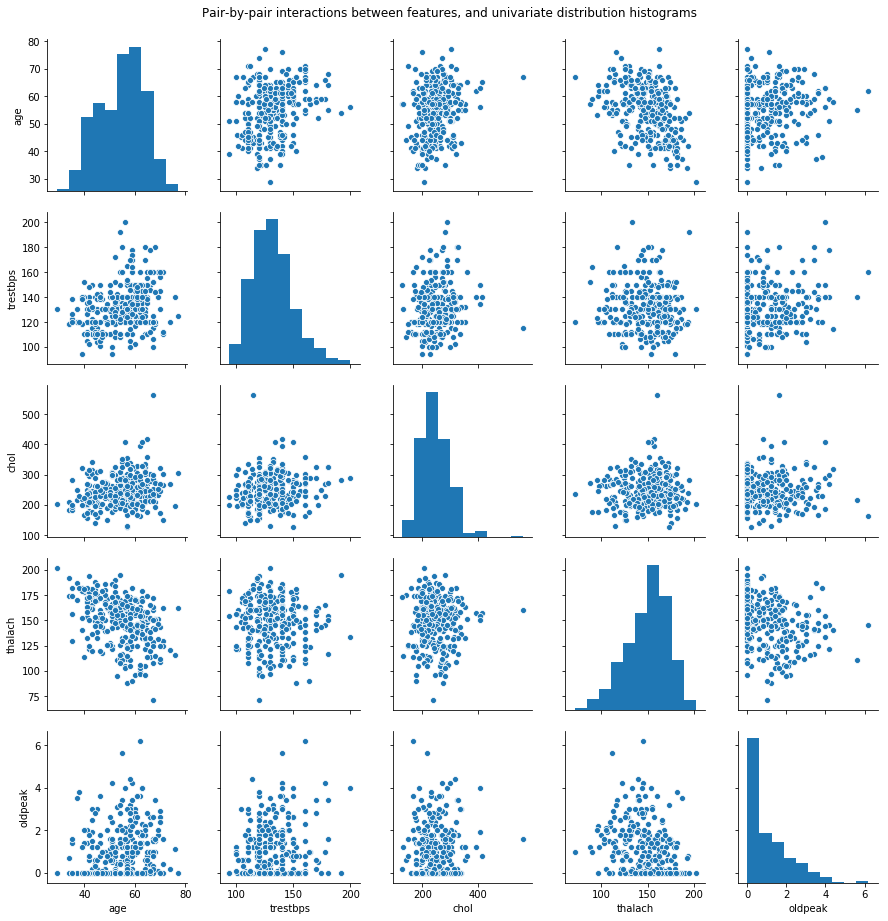

In [19]:
grid = sb.pairplot(data = df.loc[:, numerical_columns]);
grid.fig.suptitle("Pair-by-pair interactions between features, and univariate distribution histograms", y = 1.02);

From here, we can see that all our numerical attributes do not appear to be distributed in a normal-distribution structure. Most of them appear to be skewed (can be seen from the histograms), with `oldpeak` even having a structure similar to the $\gamma$ distribution.

Going further, we are interested in the pair-wise correlation coefficients between all our attributes, so as for us to understand if there should be any gain from performing a PCA analysis (_since high correlation between some components meaning that such two components can be well-represented by one PC_).

Any correlation beyond |0.3| (either + or -) could be considered as moderate correlation.

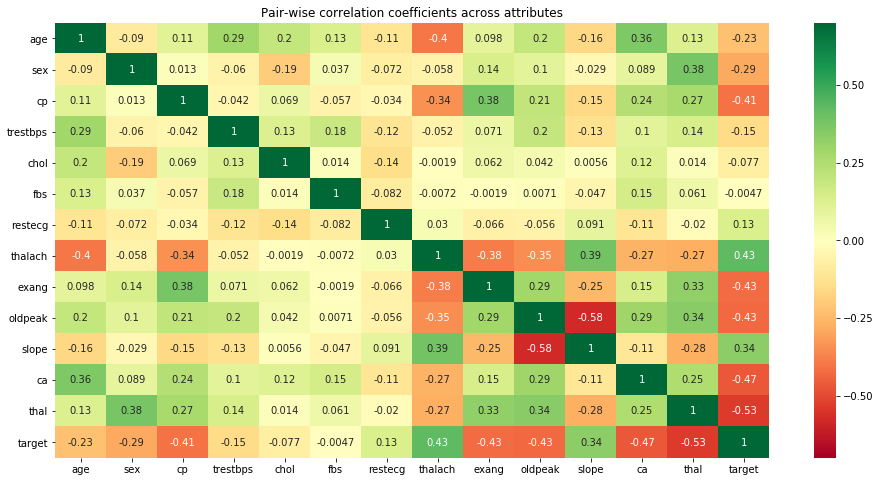

In [20]:
plt.figure(figsize = [16, 8])

sb.heatmap(df.corr(), cmap = 'RdYlGn', annot = True, vmax = 0.7, vmin = -0.7);
plt.title('Pair-wise correlation coefficients across attributes');

We can notice that only few of our attributes are moderately correlated, with most of them which do so being the categorical attributes with the same possible range of values. 

### 4. Principal Component Analysis (PCA) of the dataset

The final part of this analysis is going to be the application of a PCA analysis upon this set of data.

We need to remind ourselves of the potential challenges that our dataset presents, with respect to PCA requirements:
- Some of our attributes contain outliers
- None of our numerical features are normally distributed
- There does not appear to be a strong or moderate correlation between most of our features

Regardless, we believe that a PCA analysis can be useful in determining the importance of our variables in explaining the variance within the dataset. We are interested in seeing whether major reductions in dimensionality can be achieved through such a transformation.

Before we may proceed on with the analysis, we must notice that many of our variables, even though they appear numerical, are actually categorical variables with numerical mapping. 

In order for PCA to give accurate results, we will perform a one-out-of-K encoding on each of these variables:

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,0,150,0,2.3,1,0,6,1
1,37,1,3,130,250,0,1,187,0,3.5,1,0,3,1
2,41,0,2,130,204,0,0,172,0,1.4,3,0,3,1
3,56,1,2,120,236,0,1,178,0,0.8,3,0,3,1
4,57,0,4,120,354,0,1,163,1,0.6,3,0,3,1


In [22]:
df['sex_male'] = df.sex
df.drop(columns = 'sex', inplace = True)

In [23]:
df = pd.get_dummies(data = df, columns = ['cp'], drop_first=True)
df.rename({'cp_2': 'cp_atypical', 'cp_3' : 'cp_non_anginal', 'cp_4': 'cp_asymptomatic'}, axis = 'columns', inplace = True)

In [24]:
df['fbs_true'] = df.fbs
df.drop(columns = 'fbs', inplace = True)

In [25]:
df = pd.get_dummies(data = df, columns = ['restecg'], drop_first=True)
df.rename({'restecg_1': 'restecg_st_t', 'restecg_2' : 'restecg_hypertrophy'}, axis = 'columns', inplace = True)

In [26]:
df['exang_yes'] = df.exang
df.drop(columns = 'exang', inplace = True)

In [27]:
df = pd.get_dummies(data = df, columns = ['slope'], drop_first=True)
df.rename({'slope_2': 'slope_flat', 'slope_3' : 'slope_downsloping'}, axis = 'columns', inplace = True)

In [28]:
df = pd.get_dummies(data = df, columns = ['ca'], drop_first=True)

In [29]:
df = pd.get_dummies(data = df, columns = ['thal'], drop_first=True)
df.rename({'thal_6': 'thal_fixed', 'thal_7' : 'thal_reversible'}, axis = 'columns', inplace = True)

In [30]:
df['target_true'] = df.target
df.drop(columns = 'target', inplace = True)
df.rename({'target_true': 'target'}, axis = 'columns', inplace = True)

Here it can be seen that all of our categorical variables are now encoded properly, with their newly-created columns being given suggestive names, in order to better recognise the feature meanings:

In [31]:
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_male,cp_atypical,cp_non_anginal,cp_asymptomatic,fbs_true,restecg_st_t,restecg_hypertrophy,exang_yes,slope_flat,slope_downsloping,ca_1,ca_2,ca_3,thal_fixed,thal_reversible,target
0,63,145,233,150,2.3,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,57,120,354,163,0.6,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1


Instead of 13 attributes and 1 classifier variable as before, now we have increased the number of features to 20:

In [32]:
df.shape

(296, 21)

To perform PCA analysis more easily, we will encode the features of the dataset into a data matrix `X`, and the classifier attribute values will be stored into a vector `y`:

In [33]:
raw_data = df.get_values()

# Notice that raw_data both contains the information we want to store in a matrix X and the information that we wish to store 
# in y (the class labels, whether the patient has a heart disease or not).

print(raw_data)

[[ 63. 145. 233. ...   1.   0.   1.]
 [ 37. 130. 250. ...   0.   0.   1.]
 [ 41. 130. 204. ...   0.   0.   1.]
 ...
 [ 68. 144. 193. ...   0.   1.   0.]
 [ 57. 130. 131. ...   0.   1.   0.]
 [ 57. 130. 236. ...   0.   0.   0.]]


In [34]:
# We start by making the data matrix X by indexing into data.
cols = range(0, len(df.columns) - 1)

print(cols)

range(0, 20)


In [35]:
X = raw_data[:, cols]

print(X)

[[ 63. 145. 233. ...   0.   1.   0.]
 [ 37. 130. 250. ...   0.   0.   0.]
 [ 41. 130. 204. ...   0.   0.   0.]
 ...
 [ 68. 144. 193. ...   0.   0.   1.]
 [ 57. 130. 131. ...   0.   0.   1.]
 [ 57. 130. 236. ...   0.   0.   0.]]


In [36]:
# We can extract the attribute names that came from the columns
attributeNames = np.asarray(df.columns[cols])

print(attributeNames)

['age' 'trestbps' 'chol' 'thalach' 'oldpeak' 'sex_male' 'cp_atypical'
 'cp_non_anginal' 'cp_asymptomatic' 'fbs_true' 'restecg_st_t'
 'restecg_hypertrophy' 'exang_yes' 'slope_flat' 'slope_downsloping' 'ca_1'
 'ca_2' 'ca_3' 'thal_fixed' 'thal_reversible']


In [37]:
# The class labels are numerical already, and can be directly imported into y
classLabels = raw_data[:, -1]
classNames = np.unique(classLabels)

# This is the class index vector y:
y = classLabels.astype(int)

print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [38]:
# We can determine the number of data objects and number of attributes using the shape of X
N, M = X.shape

# Finally, the last variable that we need to have the dataset in the 
# "standard representation" for the course, is the number of classes, C:
C = len(classNames)

Now that we have the heart disease data formatted into a standard data representation, we must normalize and z-score standardize it, after which we will have a representation of our PCA analysis below:

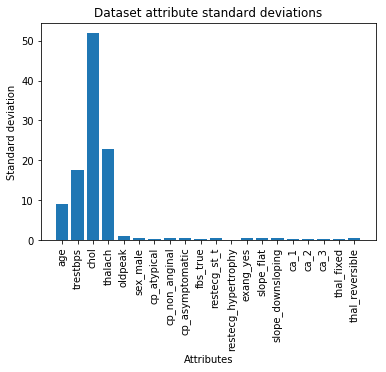

In [39]:
range_ = np.arange(1, X.shape[1] + 1)

plt.bar(range_, np.std(X, axis = 0));

plt.xticks(range_, attributeNames);
plt.xticks(rotation = 90);
plt.xlabel('Attributes');

plt.ylabel('Standard deviation');

plt.title('Dataset attribute standard deviations');

We can clearly notice that there is a wide difference in scale coming from the numerical attributes, as compared with the categorical attributes. Even among the numerical features themselves, their scales differ largely.

Thus, we must standardize the whole dataset before performing PCA, if we want to have an unbiased data representation:

In [40]:
## Investigate how standardization affects PCA

# Subtract the mean from the data
Y1 = X - np.ones(shape = (N, 1))*X.mean(axis = 0) # Y normalized

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones(shape = (N, 1))*X.mean(axis = 0)
Y2 = Y2*(1/np.std(Y2,0)) # Y normalized and standardized

# Store the two in a cell, so we can just loop over them:
Ys = [Y1, Y2]

titles = ['Zero-mean', 'Zero-mean and unit variance']

threshold = 0.9

# Choose two PCs to plot (the projection)
i = 0 # PC1
j = 1 # PC2

In [41]:
for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U,S,V = svd(Ys[k], full_matrices=False)
    V=V.T # For the direction of V to fit the convention in the course we transpose
    
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    if k==1: V = -V; U = -U; 
    
    # Compute variance explained
    rho = (S*S) / (S*S).sum() 
    
    # Compute the projection onto the principal components
    Z = U*S;

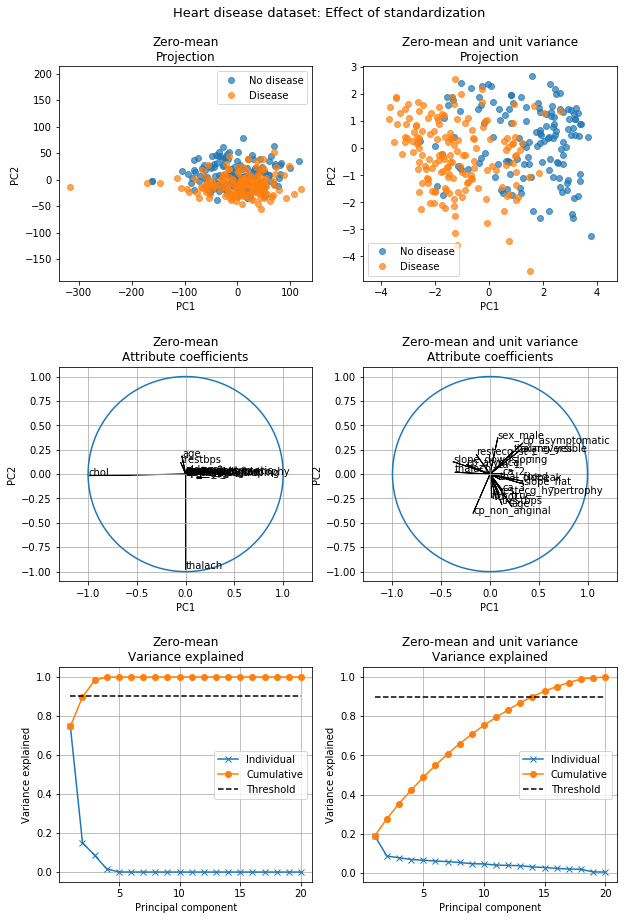

In [42]:
# Make the plots

plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.4)

nrows = 3
ncols = 2

for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U,S,V = svd(Ys[k],full_matrices=False)
    
    V=V.T # For the direction of V to fit the convention in the course we transpose
    
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    if k==1: V = -V; U = -U; 
    
    # Compute variance explained
    rho = (S*S) / (S*S).sum() 
    
    # Compute the projection onto the principal components
    Z = U*S;
    
    # Plot projection
    plt.subplot(nrows, ncols, 1+k)
    C = len(classNames)
    
    for c in range(C):
        plt.plot(Z[y==c,i], Z[y==c,j], 'o', alpha = 0.7)
        
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    
    plt.title(titles[k] + '\n' + 'Projection' )
    plt.legend(['No disease', 'Disease'])
    plt.axis('equal')
    
    
    
    
    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols,  3+k)
    
    for att in range(V.shape[1]):
        plt.arrow(0,0, V[att,i], V[att,j])
        plt.text(V[att,i], V[att,j], attributeNames[att])
        
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    plt.grid()
    
    # Add a unit circle
    plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
         np.sin(np.arange(0, 2*np.pi, 0.01)));
    
    plt.title(titles[k] +'\n'+'Attribute coefficients')
    plt.axis('equal')
    
    
    
            
    # Plot cumulative variance explained
    plt.subplot(nrows, ncols,  5+k);
    
    plt.plot(range(1,len(rho)+1), rho, 'x-')
    plt.plot(range(1,len(rho)+1), np.cumsum(rho), 'o-')
    plt.plot([1,len(rho)], [threshold, threshold], 'k--')
    
    plt.title('Variance explained by principal components');
    plt.xlabel('Principal component');
    plt.ylabel('Variance explained');
    plt.legend(['Individual','Cumulative','Threshold'])
    plt.grid()
    plt.title(titles[k]+'\n'+'Variance explained')
    
plt.suptitle('Heart disease dataset: Effect of standardization', y = 0.935, fontsize = 13);

### 5.	PCA Analysis Findings - Discussion and Conclusion

The results from the standardized PCA analysis show that, without standardization, the clusters are overlapping on a large part of the total area. 

However, when standardized, the first two principal components show a clear separatation in the data (using the class labels of vector `y`).

The attribute coefficient vectors projected onto the PC1-PC2 plane show that their lengths(norms) are similar to each other, yet their directions are widely distinct. All of this shows that the most of the attributes are important, with regards to creating data projections onto the PC1-PC2, and that the attributes have low correlation with each other. 

The PCA did not manage to achieve much reduction in dimensionality, as 14 (out of 20) components are needed in order to retain 90% of the data variance within the reduced dataset.